# Simulación de roombas

Este programa tiene la función de simular un cuarto donde se coloquen "roombas" o barredoras que se muevan a través del espacio y limpien toda suciedad que se encuentren. Se importan librerías que permiten el uso de "Multiagentes" (clases con un comportamiento específico para cumplir diferentes objetivos), uso de matrices y arreglos específicos, así como "Pandas" que permiten organizar la información del programa. 

## Reglas

Las reglas de la simulación varían según el tipo de agente, siendo la clase "TileAgent" correspondiente a las celdas que rellenarán el "Grid" creado y la clase "RoombaAgent", las barredoras que limpiarán el espacio.

Características de celdas:
1. Existen valores predefinidos en el código (sección de "Ejecución del modelo") que dictan el tamaño del grid y por ende la cantidad de agentes de celdas que se crearán (Ancho * Altura = número de agentes).
2. Otros valores predefinidos permiten el cálculo de la cantidad de celdas sucias, se eligen aleatoriamente las coordenadas de estas celdas.

Reglas de celdas:
1. Solo habrá un agente de celda por cada coordenada del grid.
2. Solo puede tener un estado, sucia o limpia, cada uno con un color diferente.
3. La primer fila de celdas tiene la característica de cargar la batería de las barredoras.

Reglas de "roombas" o barredoras:
1. Tienen dos acciones, limpiar la celda donde se encuentran o moverse en una de sus posibles direcciones (todas sus celdas adyacentes).
2. Cada acción le toma un "step" o generación, es decir, no puede moverse y limpiar al mismo tiempo.
3. Cada generación reduce en "1" la batería del "roomba", ya sea que limpie o se mueva.
4. Su batería se recarga si pasan por una celda de la primera fila del "grid".
5. Al acabarse su batería, su estado pasa a "descargada", por lo que ya no puede moverse y gráficamente cambia de color.
6. Pueden convivir en la misma celda con otros "roombas", sin interferir en sus acciones.

## Diagramas de estado

* Celda
<center>
<img src="./Diagrama de estado - Celda.png" width=auto height=auto />
</center>

* Roomba
<center>
<img src="./Diagrama de estado - Roomba barredora.png" width=auto height=auto />
</center>

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: versión 3.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes. 

In [131]:
# 'Model' sirve para definir los atributos a nivel del modelo, maneja los agentes
# 'Agent' es la unidad atómica y puede ser contenido en múltiples instancias en los modelos
from mesa import Agent, Model 

# 'MultiGrid' permite generar un "grid" que tenga la capacidad de tener más de un solo agente en una misma casilla
from mesa.space import MultiGrid

# 'SimultaneousActivation' habilita la opción de activar todos los agentes de manera simultanea.
from mesa.time import SimultaneousActivation

# 'DataCollector' permite obtener el grid completo a cada paso (o generación), útil para visualizar
from mesa.datacollection import DataCollector

from random import sample

# 'matplotlib' lo usamos para graficar/visualizar como evoluciona el autómata celular.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2 ** 128

# Definimos los siguientes paquetes para manejar valores númericos: 'numpy' & 'pandas'
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

## Crear el modelo

Este modelo se trata de una simulación de un espacio de MxN casillas o baldosas, las cuales según un porcentaje predefinido en el código, estarán sucias (color negro) o limpias (color blanco). Al iniciar el programa, un número predefinido de barredoras o "roombas" (color azul) se inician en la fila inicial, para luego moverse entre generaciones o pasos. 
Los "roombas" tienen dos acciones, limpiar la celda o moverse por el espacio, con cada acción durando una generación. El objetivo es calcular cuantos movimientos realizaron durante cada animación, el porcentaje de celdas limpias al terminar la animación y la duración de los movimientos (si se terminaron de limpiar las celdas, se les acabó la batería o llegaron al tiempo máximo).

In [132]:
class TileAgent(Agent):
    """
    Representa a un agente o una celda con estado sucio (1) o limpio (0)
    """
    def __init__(self, unique_id, dirt, model):
        """
        Crea un agente que según el estado de suciedad (parámetro "dirt") va a corresponder a una celda/baldosa limpia (dirt = 0) o sucia (dirt = 1)
        """
        super().__init__(unique_id, model)
        if dirt:
            self.dirty = 1
        else:
            self.dirty = 0
    
#    def step(self):
        """
        En este método se realizan los pasos
        """

    #def advance(self):
        """
        Define el nuevo estado calculado del método step.
        """

class RoombaAgent(Agent):
    """
    Esta clase corresponde al agente del "roomba" o barredora. Tiene sus métodos para sus acciones, dar un paso entre sus 8 posibles direcciones 
    o limpiar la celda donde se encuentra.
    """
    def __init__(self, unique_id, initial_charge, model):

        super().__init__(unique_id, model)
        self.battery = initial_charge
        self.initial_charge = initial_charge
        self.movements = 0
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False,
            )

        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position, )

        self.movements += 1

    def step(self):

        posX, posY  = self.pos

        if(posX == 0):
            self.battery = self.initial_charge

        if self.battery > 0:
            self.battery -= 1

            # Guarda en un arreglo a los agentes que se encuentran en la misma celda
            cellmates = self.model.grid.get_cell_list_contents([self.pos])

            #print(self.pos)
            for cellmate in cellmates:
                if(isinstance(cellmate, TileAgent)):
                    if(cellmate.dirty == 1):
                        # print(self.pos, cellmate.dirty)
                        cellmate.dirty = 0;
                    else:
                        self.move();


class CleaningRoomModel(Model):
    """
    Define el modelo de la habitación de limpieza
    """
    def __init__(self, width, height, num_roomba_agents, initial_charge, random):
        self.num_agents = width * height
        self.num_roomba_agents = num_roomba_agents
        self.grid = MultiGrid(width, height, False)
        self.schedule = SimultaneousActivation(self)
        """
        Crea los agentes 'Tiles'
        """
        # Genera una lista de coordenadas que serán determinadas como sucias y las guarda en el arreglo dirtListRandom
        dirtList = []
        for (content, x, y) in self.grid.coord_iter():
            dirtList.append([x,y])
        dirtListRandom = sample(dirtList, random)

        # Crea los agentes 'Tile'  y les asigna su estado de suciedad dependiendo el arreglo 'dirtListRandom'
        for (content, x, y) in self.grid.coord_iter():
            dirt = False

            # Si la coordenada está en el arreglo de celdas sucias, cambia el valor dirt a True para significar que esa celda está sucia 
            if [x,y] in dirtListRandom:
                dirt = True

            # Crea el agente 'Tile'
            a = TileAgent((x, y), dirt, self)
            self.grid.place_agent(a, (x, y))
            # self.schedule.add(a)

        """
        Crea los agentes 'Roomba'
        """
        # Se generan los roombas en la primera fila, colocándose uno por uno en cada celda de la misma
        for i in range(num_roomba_agents):
            r = RoombaAgent(i, initial_charge, self)
            self.grid.place_agent(r, (0, i % height)) # El operador % permite ir asignando las posiciones en la primer fila, sin repetir siempre la misma celda
            self.schedule.add(r)

        # Aquí definimos el colector de datos para obtener el grid completo.
        self.datacollector = DataCollector(
            model_reporters={
                "Grid": self.get_grid,
                "% Casillas limpias": self.get_clean_tiles
            },
            agent_reporters={
                "Movimientos": "movements"
            }
        )

    def step(self):
        """
        En cada paso el colector toma la información que se definió y almacena el grid para luego
        graficarlo.
        """
        self.datacollector.collect(self)
        self.schedule.step()

    def get_grid(self):
        """
        Esta es una función auxiliar que nos permite guardar el grid para cada uno de los agentes.
        :param model: El modelo del cual obtener el grid.
        :return: Matriz con la información del grid del agente.
        """

        # Generamos la grid para contener los valores
        grid = np.zeros((self.grid.width, self.grid.height))

        # Asignamos una celda a cada uno de los elementos de la grilla, manda los valores de suciedad o de barredora a la celda para su color designado
        for cell in self.grid.coord_iter():
            cell_content, x, y = cell
            # Si detecta más de un agente en la misma celda, significa que hay una barredora y debe predominar su color en la celda
            if len(cell_content) > 1:
                grid[x][y] = 3 if cell_content[1].battery > 0 else 2
            else:
                grid[x][y] = cell_content[0].dirty
                
        # Regresa el grid con cada celda teniendo un valor para su coloreado. 0 = blanco, 1 = negro, 2 = azul
        return grid

    def get_clean_tiles(self):

        clean_tiles = 0

        for cell_content, x, y in self.grid.coord_iter():
            if cell_content[0].dirty == 0:
                clean_tiles += 1

        return clean_tiles/self.num_agents

# Ejecución del modelo
A continuación corremos el modelo, asignando valores de anchura, altura, generaciones, número de agentes, etc.

In [137]:
# Definimos el ancho del Grid
GRID_WIDTH = 6

# Definimos la altura del Grid
GRID_HEIGHT = 6

# Definimos el número de generaciones a correr
NUM_GENERATIONS = 50

# Definimos el porcentaje de celdas sucias al comenzar la simulación (valor decimal)
DIRT_PRCNTG = 0.50

# Definimos el número de agentes
NUM_AGENTS = 3

# Carga inicial de los agentes Roomba
INITIAL_CHARGE = 20

# Obtener el número exacto de celdas sucias, usando el tamaño del grid y su porcentaje de suciedad
random = int((GRID_HEIGHT * GRID_WIDTH) * DIRT_PRCNTG)

# Registramos el tiempo de inicio y corremos el modelo
start_time = time.time()
model = CleaningRoomModel(GRID_WIDTH, GRID_HEIGHT, NUM_AGENTS, INITIAL_CHARGE, random)
for i in range(NUM_GENERATIONS):
    model.step()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(time.time() - start_time))))

Tiempo de ejecución: 0:00:00.009969


Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información. Esta información se utiliza para la graficación/animación posterior.

In [138]:
all_grid = model.datacollector.get_model_vars_dataframe().loc[:,["Grid"]]
clean_tiles_percentage = model.datacollector.get_model_vars_dataframe().loc[:,["% Casillas limpias"]]

gens_to_complete_cleaning = 0

for gen in clean_tiles_percentage["% Casillas limpias"]:
    gens_to_complete_cleaning += 1
    if(gen == 1):
        break

roomba_movements = model.datacollector.get_agent_vars_dataframe()
total_roomba_movements = 0

# Revisa los últimos 'NUM_AGENTS' valores de la columna 'Movimientos' del dataframe 'roomba_movements' y los suma a la variable 'total_roomba_movements'
for i in range(NUM_AGENTS):
    total_roomba_movements += roomba_movements["Movimientos"].iat[-i-1]



Información del Modelo

Generaciones que tardó en limpiar toda la habitación:  50
Porcentaje de celdas limpias después del termino de la simulación:  83.33333333333334 %
Número de movimientos realizados por todos los agentes:  86


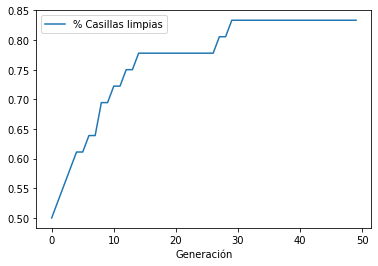

In [139]:
clean_tiles_plt = clean_tiles_percentage[clean_tiles_percentage["% Casillas limpias"] < 1].plot()
clean_tiles_plt.set_xlabel("Generación")

print("Generaciones que tardó en limpiar toda la habitación: ", gens_to_complete_cleaning)
print("Porcentaje de celdas limpias después del termino de la simulación: ", clean_tiles_percentage["% Casillas limpias"].iat[-1]*100, "%")
print("Número de movimientos realizados por todos los agentes: ", total_roomba_movements)


Graficamos la información usando `matplotlib`

In [140]:
%%capture
fig, axs = plt.subplots(figsize=(8,8))
axs.set_xticks([])
axs.set_yticks([])
cmap = matplotlib.cm.get_cmap('viridis', 4) # Puede ser cualquier otra
cmap = cmap(np.linspace(0, 1, 4))
cmap[0] = np.array([256/256, 256/256, 256/256, 1]) # Tile limpia
cmap[1] = np.array([0/256, 0/256, 0/256, 1]) # Tile sucia
cmap[2] = np.array([0/256, 50/256, 100/256, 1]) # Roomba con batería
cmap[3] = np.array([0/256, 50/256, 200/256, 1]) # Roomba sin batería

new_cmap = matplotlib.colors.ListedColormap(cmap)
patch = plt.imshow(all_grid.iloc[0][0], cmap=new_cmap)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames=NUM_GENERATIONS)

In [141]:
anim